In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score,  classification_report
from sklearn.model_selection import train_test_split 
from sklearn import preprocessing
import ipaddress

In [2]:
DATADIR = '/home/infres/abiapo/prim/data'

In [4]:
data = pd.read_csv(DATADIR+'/balance_mix_data.csv')
data.head()

,Unnamed:_0,Flow_ID,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label,label
0,112140,172.16.0.5-192.168.50.1-44231-8387-17,172.16.0.5,44231,192.168.50.1,8387,17,2018-12-01 13:45:46.994571,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1
1,25309,172.16.0.5-192.168.50.1-891-63192-17,172.16.0.5,891,192.168.50.1,63192,17,2018-12-01 12:14:48.493601,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP,1
2,3538,172.16.0.5-192.168.50.1-649-33920-17,172.16.0.5,649,192.168.50.1,33920,17,2018-12-01 10:36:57.214865,1620,126,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NTP,1
3,11531,192.168.10.50-192.168.50.6-22-56370-6,192.168.50.6,56370,192.168.10.50,22,6,2018-11-03 12:46:39.696861,8996366,6,...,2995940.0,2995940.0,6000423.0,0.0,6000423.0,6000423.0,0,1,BENIGN,0
4,1489,192.168.50.6-4.2.2.4-58840-53-17,192.168.50.6,58840,4.2.2.4,53,17,2018-12-01 10:59:03.241570,20681,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN,0


In [5]:
data = data.drop(['Unnamed:_0'],axis=1)

In [12]:
data['Source_IP'] = data['Source_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))
data['Destination_IP'] = data['Destination_IP'].apply(lambda ip: int(ipaddress.ip_address(ip)))

In [11]:
int(ipaddress.ip_address('10.10.10.10'))

168430090

In [22]:
data.head()

,Source_IP,Source_Port,Destination_IP,Destination_Port,Protocol,Timestamp,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,...,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,SimillarHTTP,Inbound,Label,label
0,2886729733,44231,3232248321,8387,17,2018-12-01 13:45:46.994571,0,2,0,1032.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,TFTP,1
1,2886729733,891,3232248321,63192,17,2018-12-01 12:14:48.493601,2,2,0,2944.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_SNMP,1
2,2886729733,649,3232248321,33920,17,2018-12-01 10:36:57.214865,1620,126,0,55440.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_NTP,1
3,3232248326,56370,3232238130,22,6,2018-11-03 12:46:39.696861,8996366,6,0,0.0,...,2995940.0,2995940.0,6000423.0,0.0,6000423.0,6000423.0,0,1,BENIGN,0
4,3232248326,58840,67240452,53,17,2018-12-01 10:59:03.241570,20681,2,2,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,BENIGN,0


In [92]:
data.columns

Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'Protocol', 'Flow_Duration', 'Total_Fwd_Packets',
       'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes_s', 'Flow_Packets_s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets_s', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean',
       'Packet_Length_Std'

In [18]:
data['Flow_ID'][0]

'172.16.0.5-192.168.50.1-44231-8387-17'

In [21]:
data = data.drop(['Flow_ID'],axis=1)

In [23]:
data['Timestamp'][0]

'2018-12-01 13:45:46.994571'

In [41]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [44]:
data = data.drop(['Timestamp'],axis=1)

In [83]:
data['SimillarHTTP'] = data['SimillarHTTP'].convert_dtypes()

In [ ]:
data['SimillarHTTP'].iloc[np.where(data['SimillarHTTP']!='0')].to_list()

SimilarHTTP has a different structure. Maybe we could perform a wordembedding to transform the string to numerical value. For the moment we will delete this feature.

In [96]:
data = data.drop(['SimillarHTTP'],axis=1)

In [111]:
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [113]:
X = data.iloc[:,:-2]
y = data.iloc[:,-1].to_numpy()

In [123]:
all(X>0)

True

In [127]:
X.iloc[:,[35,36,37,47,50,54,60,61,62,63,64,65]]

,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,FIN_Flag_Count,PSH_Flag_Count,ECE_Flag_Count,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
218537,0,0,0,0,0,0,0,0,0,0,0,0
218538,0,0,0,0,0,0,0,0,0,0,0,0
218539,0,0,0,0,0,0,0,0,0,0,0,0
218540,0,0,0,0,0,0,0,0,0,0,0,0


# Feature selection

## Univariate method

In [214]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SelectFromModel

In [187]:
#Select top 2 features based on f_classif
selector = SelectKBest(f_classif, k = 20).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

/home/infres/abiapo/prim_ml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [35 36 37 47 50 54 60 61 62 63 64 65] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/infres/abiapo/prim_ml/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [188]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.head()

,Specs,Score
0,Source_IP,3088.218495
1,Source_Port,14484.364758
2,Destination_IP,131892.416410
3,Destination_Port,69646.428307
4,Protocol,116197.690449


In [189]:
print(featureScores.nlargest(20,'Score'))

                     Specs          Score
82                 Inbound  462266.190790
42       Min_Packet_Length  177346.597914
11   Fwd_Packet_Length_Min  175117.476648
12  Fwd_Packet_Length_Mean  157338.314600
57    Avg_Fwd_Segment_Size  157338.314600
56     Average_Packet_Size  131976.869431
2           Destination_IP  131892.416410
44      Packet_Length_Mean  130341.451580
4                 Protocol  116197.690449
52          URG_Flag_Count   88834.372220
55           Down_Up_Ratio   81668.099475
40           Fwd_Packets_s   80583.814754
19          Flow_Packets_s   79184.437235
18            Flow_Bytes_s   76059.089470
3         Destination_Port   69646.428307
10   Fwd_Packet_Length_Max   57386.778973
15   Bwd_Packet_Length_Min   34612.381219
53          CWE_Flag_Count   27753.063947
16  Bwd_Packet_Length_Mean   19628.956456
58    Avg_Bwd_Segment_Size   19628.956456


<AxesSubplot:xlabel='Score', ylabel='Specs'>

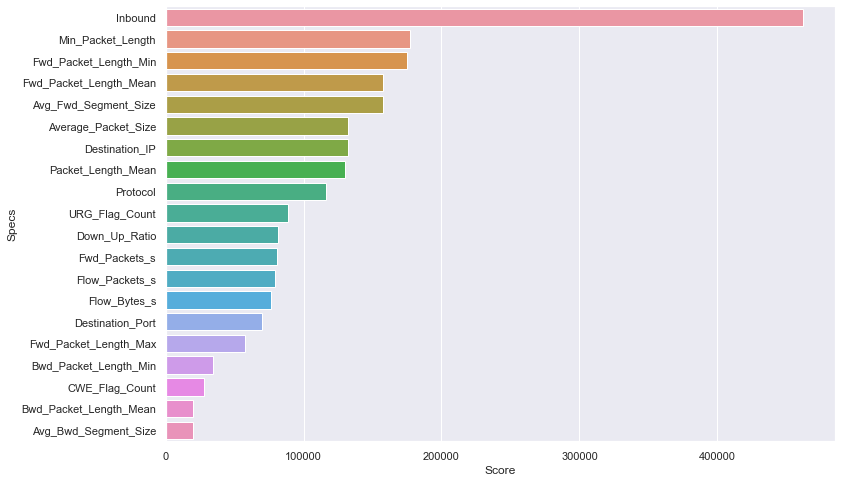

In [190]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = featureScores.nlargest(20,'Score'), x = "Score", y = "Specs")

In [191]:
#Select top 2 features based on mutual_info_classif
selector = SelectKBest(mutual_info_classif, k = 20).fit(X, y)
dfscores = pd.DataFrame(selector.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [192]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.head()

,Specs,Score
0,Source_IP,0.707292
1,Source_Port,0.436162
2,Destination_IP,0.695403
3,Destination_Port,0.544111
4,Protocol,0.217401


In [193]:
print(featureScores.nlargest(20,'Score'))

                          Specs     Score
0                     Source_IP  0.707292
2                Destination_IP  0.695403
56          Average_Packet_Size  0.593566
44           Packet_Length_Mean  0.579649
12       Fwd_Packet_Length_Mean  0.578565
57         Avg_Fwd_Segment_Size  0.578327
42            Min_Packet_Length  0.578291
11        Fwd_Packet_Length_Min  0.576608
43            Max_Packet_Length  0.561942
18                 Flow_Bytes_s  0.558920
8   Total_Length_of_Fwd_Packets  0.556156
67            Subflow_Fwd_Bytes  0.555453
3              Destination_Port  0.544111
10        Fwd_Packet_Length_Max  0.542333
19               Flow_Packets_s  0.462044
40                Fwd_Packets_s  0.457993
22                 Flow_IAT_Max  0.452127
20                Flow_IAT_Mean  0.447546
82                      Inbound  0.446375
5                 Flow_Duration  0.440963


<AxesSubplot:xlabel='Score', ylabel='Specs'>

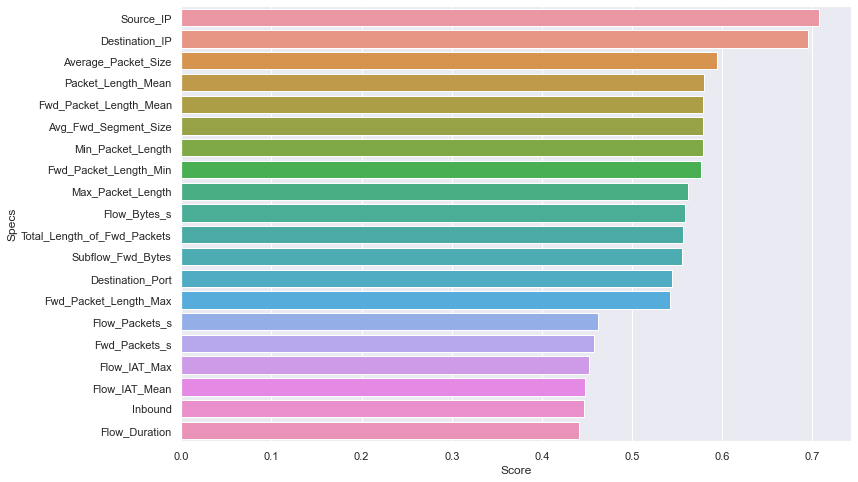

In [194]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = featureScores.nlargest(20,'Score'), x = "Score", y = "Specs")

To choose a value of $k$ we must compare the performance of the model with classification report of serveral techniques. Now we focus on the different selection techniques

## Feature Correlation Method

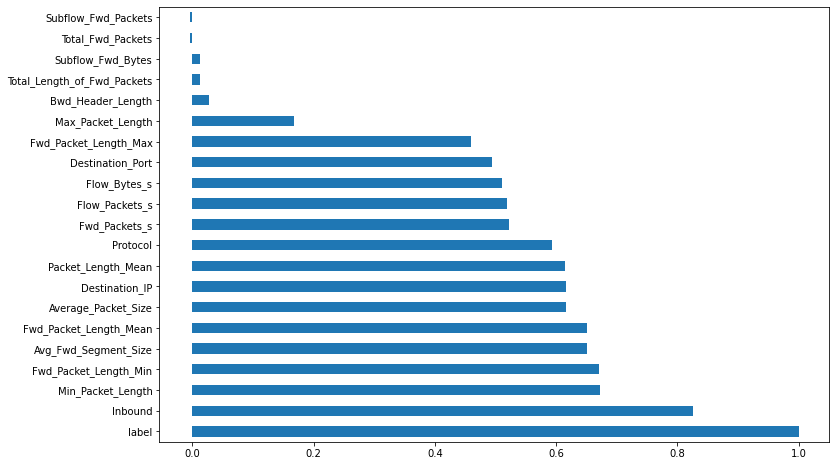

In [177]:
# determine 20 most correlated features
plt.figure(figsize=(12,8))
data_corr_label = data.corr()['label'].sort_values(ascending=False).head(21)
top_corr_features = data_corr_label.index
# plot top 20 most correlated features to our target (HEALTH)
data_corr_label.plot(kind='barh')
plt.show()

In [182]:
# export selected features to .csv
#df_corr_health.to_csv('feature_selection_CORRELATION.csv')
print(data_corr_label)

label                          1.000000
Inbound                        0.826326
Min_Packet_Length              0.672549
Fwd_Packet_Length_Min          0.670217
Avg_Fwd_Segment_Size           0.650285
Fwd_Packet_Length_Mean         0.650285
Average_Packet_Size            0.616972
Destination_IP                 0.616849
Packet_Length_Mean             0.614588
Protocol                       0.592556
Fwd_Packets_s                  0.522371
Flow_Packets_s                 0.519047
Flow_Bytes_s                   0.511427
Destination_Port               0.494880
Fwd_Packet_Length_Max          0.459225
Max_Packet_Length              0.167869
Bwd_Header_Length              0.027629
Total_Length_of_Fwd_Packets    0.012894
Subflow_Fwd_Bytes              0.012894
Total_Fwd_Packets             -0.004159
Subflow_Fwd_Packets           -0.004159
Name: label, dtype: float64


## Feature Importance Method

### Extra Tree Classifier 

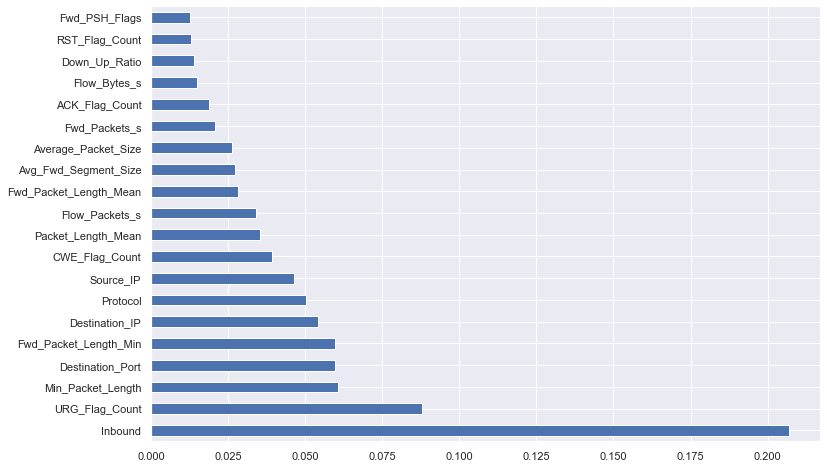

In [200]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### RandomForest Classifier

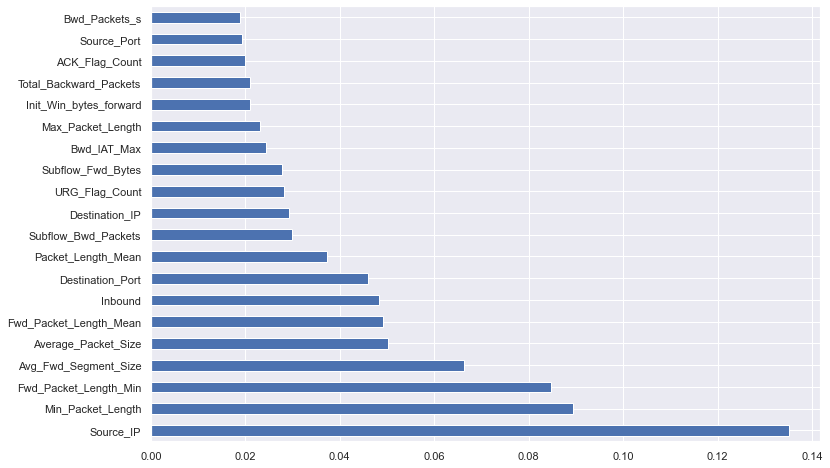

In [201]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Recursive Feature Elimination

In [ ]:
rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rfe_selector.fit(X,y)

In [213]:
print(X.loc[:,rfe_selector.support_].columns.to_numpy())

['Source_IP' 'Source_Port' 'Destination_IP' 'Destination_Port' 'Protocol'
 'Fwd_Packet_Length_Max' 'Fwd_Packet_Length_Min' 'Fwd_Packet_Length_Mean'
 'Min_Packet_Length' 'Packet_Length_Mean' 'Packet_Length_Std'
 'Packet_Length_Variance' 'ACK_Flag_Count' 'URG_Flag_Count'
 'Average_Packet_Size' 'Avg_Fwd_Segment_Size' 'Subflow_Bwd_Packets'
 'Init_Win_bytes_forward' 'Init_Win_bytes_backward' 'Inbound']


## Feature Selection via SelectFromModel

In [215]:
sfm_selector = SelectFromModel(estimator = RandomForestClassifier())
sfm_selector.fit(X, y)
X.columns[sfm_selector.get_support()]

Index(['Source_IP', 'Source_Port', 'Destination_IP', 'Destination_Port',
       'Protocol', 'Total_Backward_Packets', 'Total_Length_of_Fwd_Packets',
       'Fwd_Packet_Length_Max', 'Fwd_Packet_Length_Min',
       'Fwd_Packet_Length_Mean', 'Bwd_Header_Length', 'Bwd_Packets_s',
       'Min_Packet_Length', 'Packet_Length_Mean', 'ACK_Flag_Count',
       'URG_Flag_Count', 'Average_Packet_Size', 'Avg_Fwd_Segment_Size',
       'Init_Win_bytes_forward', 'Inbound'],
      dtype='object')

## Feature Selection Sequential Feature Selection (SFS)